In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [103]:
setwd('/import/DB/fel/BJTC-204')

In [104]:
library(dplyr)

In [105]:
#load('jiaocha.rda')

In [106]:
female.gene = read.csv('diffgene1-female.csv',row.names = 1)

In [5]:
head(female.gene)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ABCB1,-0.5143795,6.254714,-4.702209,1.485257e-05,0.1187577,2.745530,NOT,ABCB1
ARL4C,0.5231190,7.853045,4.493683,3.128339e-05,0.1187577,2.115081,NOT,ARL4C
S100A10,-0.5016684,7.649009,-4.454364,3.594317e-05,0.1187577,1.997603,NOT,S100A10
TIAM1,0.3050152,8.345453,4.310528,5.945970e-05,0.1187577,1.571896,NOT,TIAM1
ATP2B2,0.5390423,8.108197,4.291540,6.350969e-05,0.1187577,1.516191,NOT,ATP2B2
VIM,-0.6917721,9.777355,-4.232101,7.799159e-05,0.1187577,1.342589,NOT,VIM


In [6]:
female.gene = female.gene %>% dplyr::filter(change != 'NOT') %>% rownames()

In [7]:
load('./exp4.rda')

In [8]:
dim(exp4)

[1]   251 11882

In [9]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'F')

In [10]:
colnames(exp4) = gsub('-','.',colnames(exp4))

In [11]:
expr = exp4[,female.gene]

In [12]:
#expr[,1:dim(expr)[2]] = 2^expr[,1:dim(expr)[2]] -1

In [13]:
head(expr)

,PCP4,IFITM1,PVALB,TIMP1,NCALD,SST,CCK,NBEA,RGS4,KIFAP3,...,DCLK1,NEFL,YWHAH,TAC1,GABRA1,PCSK1,GJA1,S100A8,SERPINA3,PEG3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431722,9.885215,9.830148,8.294247,9.268770,10.138465,7.748143,10.565497,8.363692,10.974758,10.258609,...,10.809825,11.056206,11.485026,6.146416,9.235533,8.104277,8.947685,10.984133,9.640103,7.325042
GSM2431723,8.297279,9.570485,6.697168,7.662765,9.147454,6.678002,9.981235,7.461687,10.050248,9.145242,...,9.694745,10.200621,11.016718,5.092445,8.909206,7.317604,11.249189,10.167143,10.060515,7.552029
GSM2431739,8.037826,9.972350,5.850739,7.914789,7.219012,7.082395,7.300738,6.078981,8.169649,7.653531,...,7.808774,8.118054,8.096981,4.908146,7.019920,6.165766,11.369419,8.443263,8.646977,4.841931
GSM2431740,8.167197,11.118484,5.172074,9.243227,6.483084,6.402584,6.976383,5.506079,7.517618,7.272091,...,6.516491,7.222770,7.725038,4.793965,6.358461,5.973130,11.550301,10.588874,9.570476,4.629868
GSM2431745,10.087936,8.431716,8.987666,7.366018,9.819902,8.453500,10.630330,8.034214,10.700036,9.531990,...,10.679126,11.126867,11.263571,7.212075,8.934821,8.478796,10.384048,6.683107,7.707674,7.582765
GSM2431749,9.756311,9.542220,6.621966,9.174957,8.719936,7.417237,9.812168,7.464857,9.334187,8.719223,...,9.814741,10.132383,10.546573,5.981116,7.539344,7.196107,11.131924,8.293950,11.225159,5.416625


In [14]:
type = exp4$TYPE

In [15]:
type = ifelse(type == 'MDD',1,0)

In [16]:
y = type

In [17]:
colnames(expr) = gsub('-','.',colnames(expr))

In [18]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [19]:
library(dplyr)

In [20]:
x = as.matrix(expr)
y = y

In [21]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




png 
  2

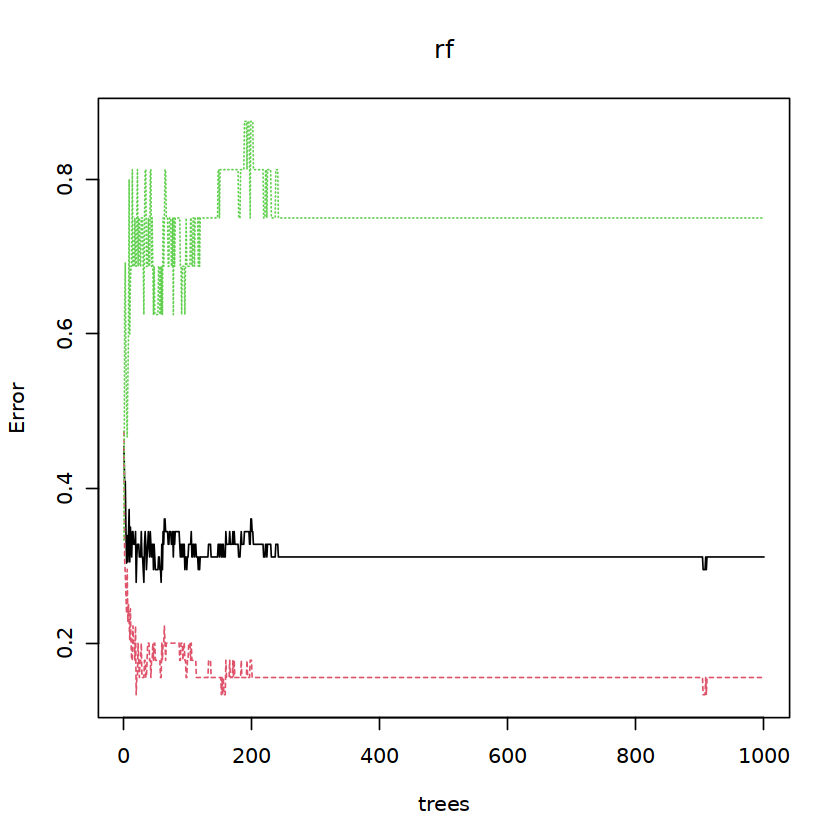

In [23]:
set.seed(110)
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)
plot(rf)
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

NCALD        CCK     GABRG2       SOX9     IFITM1       SYT1       CRYM 
1.78085080 1.61727987 1.53657049 1.09997295 1.08038835 1.00962611 0.92803997 
     DCLK1       PCP4   SERPINA3       CHGB      FGF13        SST      YWHAH 
0.88321612 0.87276907 0.83703173 0.77271468 0.76282555 0.75398905 0.72444179 
     TIMP1       PEG3       NEFL     KIFAP3       NBEA       TAC1       GJA1 
0.67482913 0.63150890 0.60176253 0.57943256 0.56132391 0.56030303 0.55486208 
     PCMT1       GOT1     S100A8       SCG2   ATP6V1B2     GABRA1      PVALB 
0.53030972 0.52578719 0.51733285 0.44626294 0.41952381 0.40186855 0.38696895 
   AGXT2L1       RGS4       GLRB      PCSK1     SUCLA2 
0.30253304 0.29277778 0.29231602 0.09947368 0.09553303

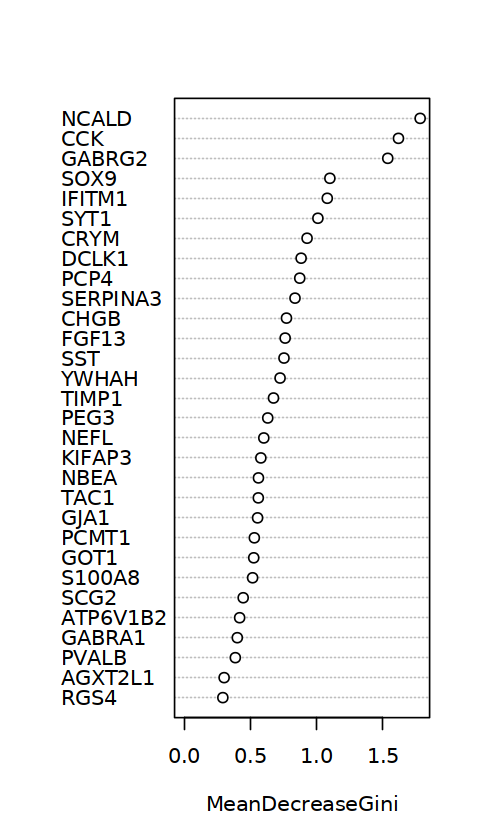

In [24]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [25]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [26]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

[1] 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
[39] 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1

Boruta performed 299 iterations in 27.93695 secs.
 8 attributes confirmed important: CCK, DCLK1, IFITM1, NCALD, PCP4 and
3 more;
 24 attributes confirmed unimportant: AGXT2L1, ATP6V1B2, CHGB, CRYM,
FGF13 and 19 more;
 1 tentative attributes left: NEFL;


Tentative Confirmed  Rejected 
        1         8        24 

PCP4    IFITM1     PVALB     TIMP1     NCALD       SST       CCK      NBEA 
Confirmed Confirmed  Rejected  Rejected Confirmed Confirmed Confirmed  Rejected 
     RGS4    KIFAP3      CRYM      GLRB      SYT1      GOT1      CHGB   AGXT2L1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
     SOX9      SCG2  ATP6V1B2     PCMT1    SUCLA2    GABRG2     FGF13     DCLK1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected Confirmed 
     NEFL     YWHAH      TAC1    GABRA1     PCSK1      GJA1    S100A8  SERPINA3 
Tentative Confirmed  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected 
     PEG3 
 Rejected 
Levels: Tentative Confirmed Rejected

Boruta performed 299 iterations in 27.93695 secs.
 8 attributes confirmed important: CCK, DCLK1, IFITM1, NCALD, PCP4 and
3 more;
 24 attributes confirmed unimportant: AGXT2L1, ATP6V1B2, CHGB, CRYM,
FGF13 and 19 more;
 1 tentative attributes left: NEFL;

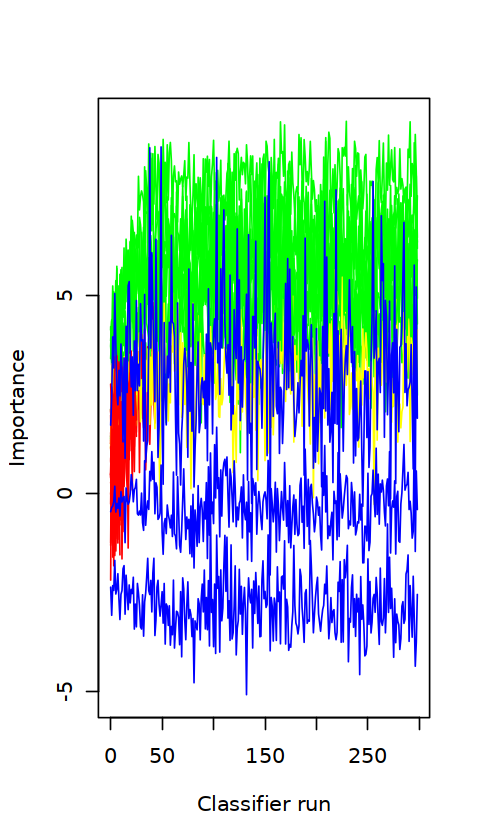

In [27]:
library(Boruta)

y

set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

boruta

table(boruta$finalDecision)

boruta$finalDecision

Boruta::plotImpHistory(boruta)

library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [28]:
# lasso

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



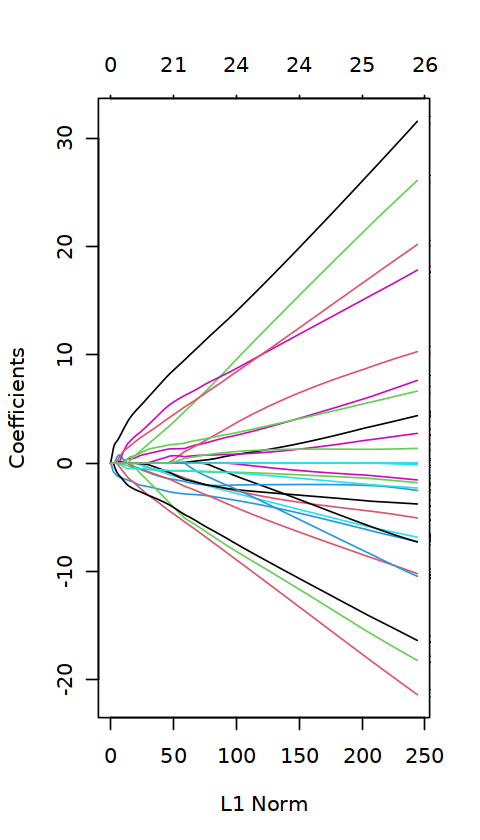

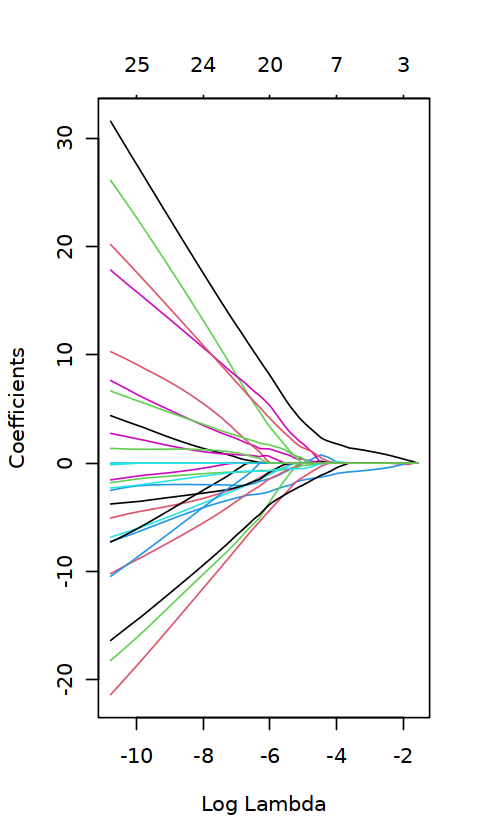

[1] 0.04678623 0.11862015

[1] "PCP4"    "TIMP1"   "AGXT2L1"

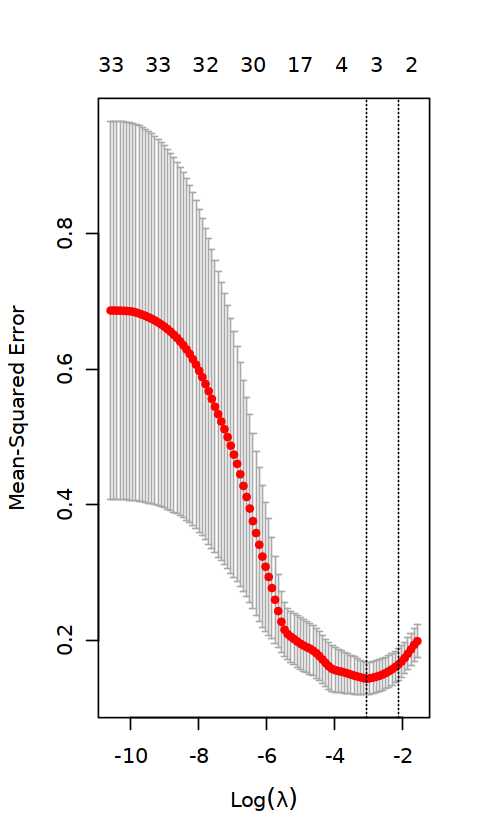

In [29]:
library(lars) 
library(glmnet) 

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

plot(model_lasso, xvar="lambda", label=TRUE)

cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

# ### 韦恩图

# importance$Feature

# RF.gene = names(rfGenes)[1:10]
# #SVF.RFE.gene = featureGenes
# XGBoost.gene = importance$Feature[1:10]

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# lasso.gene  = gene_1se

# list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(c1 = data[,1], c2 = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# model.gene = intersect(lasso.gene,XGBoost.gene)



# model.gene  =lasso.gene

# model.gene

In [30]:
set.seed(1234)

In [31]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [32]:
colnames(expr3)[1] = 'Group'

In [33]:
expr4 = expr3 

In [34]:
dim(expr4)

[1] 61 34

In [35]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [36]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.7){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


[1] "PCP4 0.833333333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PVALB 0.779166666666667"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NCALD 0.801388888888889"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SST 0.773611111111111"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CCK 0.819444444444444"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NBEA 0.765277777777778"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RGS4 0.781944444444444"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "KIFAP3 0.763888888888889"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CRYM 0.780555555555556"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GLRB 0.765277777777778"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SYT1 0.772222222222222"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GOT1 0.766666666666667"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CHGB 0.765277777777778"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SCG2 0.738888888888889"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ATP6V1B2 0.745833333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PCMT1 0.776388888888889"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SUCLA2 0.745833333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GABRG2 0.726388888888889"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FGF13 0.748611111111111"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DCLK1 0.783333333333333"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NEFL 0.766666666666667"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "YWHAH 0.756944444444444"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TAC1 0.744444444444444"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GABRA1 0.725"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PCSK1 0.731944444444444"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PEG3 0.705555555555555"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 62 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [37]:
a

[1] "PCP4"     "PVALB"    "NCALD"    "SST"      "CCK"      "NBEA"    
 [7] "RGS4"     "KIFAP3"   "CRYM"     "GLRB"     "SYT1"     "GOT1"    
[13] "CHGB"     "SCG2"     "ATP6V1B2" "PCMT1"    "SUCLA2"   "GABRG2"  
[19] "FGF13"    "DCLK1"    "NEFL"     "YWHAH"    "TAC1"     "GABRA1"  
[25] "PCSK1"    "PEG3"

In [38]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [39]:
Boruta.gene

[1] "CCK"    "DCLK1"  "IFITM1" "NCALD"  "NEFL"   "PCP4"   "S100A8" "SST"   
[9] "YWHAH"

In [40]:
gene_1se

[1] "PCP4"    "TIMP1"   "AGXT2L1"

In [82]:
rf.gene = names(rfGenes)[1:10]

In [83]:
gene = intersect(rf.gene,a)

In [84]:
gene

[1] "NCALD"  "CCK"    "GABRG2" "SYT1"   "CRYM"   "DCLK1"  "PCP4"

In [85]:
expr4 = expr3

In [86]:
expr4 = expr4[,c('Group',gene)]

In [87]:
#expr4 = expr4

In [88]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NCALD,1.7576321,0.6221916,2.824905,0.004729465,5.798690,2.056666,24.298445,NCALD
CCK,1.9738334,0.7186243,2.746683,0.006020123,7.198217,2.231273,37.244883,CCK
GABRG2,0.9349213,0.3639375,2.568906,0.010202018,2.547013,1.334776,5.664146,GABRG2
SYT1,0.7561439,0.2697263,2.803375,0.005057088,2.130047,1.330194,3.877076,SYT1
CRYM,1.8456965,0.6683110,2.761733,0.005749546,6.332509,2.067874,29.035963,CRYM
DCLK1,1.9131030,0.7297601,2.621551,0.008753074,6.774076,2.016826,35.396840,DCLK1
PCP4,2.4550128,0.7978573,3.077007,0.002090901,11.646583,3.143410,76.076267,PCP4


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NCALD,1.7576321,0.004729465,5.798690,2.056666,24.298445,NCALD
CCK,1.9738334,0.006020123,7.198217,2.231273,37.244883,CCK
GABRG2,0.9349213,0.010202018,2.547013,1.334776,5.664146,GABRG2
SYT1,0.7561439,0.005057088,2.130047,1.330194,3.877076,SYT1
CRYM,1.8456965,0.005749546,6.332509,2.067874,29.035963,CRYM
DCLK1,1.9131030,0.008753074,6.774076,2.016826,35.396840,DCLK1
PCP4,2.4550128,0.002090901,11.646583,3.143410,76.076267,PCP4


[1] "NCALD"  "CCK"    "GABRG2" "SYT1"   "CRYM"   "DCLK1"  "PCP4"

In [89]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6742  -0.5945  -0.2215   0.5546   2.0874  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -24.8433    10.1698  -2.443   0.0146 *
NCALD         1.4298     1.7219   0.830   0.4063  
CCK           1.0279     1.8186   0.565   0.5719  
GABRG2       -2.2205     1.4297  -1.553   0.1204  
SYT1          1.3497     0.7791   1.732   0.0832 .
CRYM         -1.3033     1.7269  -0.755   0.4504  
DCLK1        -0.1963     1.5934  -0.123   0.9019  
PCP4          2.1695     1.1530   1.882   0.0599 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.204  on 60  degrees of freedom
Residual deviance: 45.497  on 53  degrees of freedom
AIC: 61.497

Number of Fisher Scoring iterations: 7


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-24.843,5.968,0(0~0),0.015
NCALD,1.430,0.690,4.178(0.155~149.693),0.406
CCK,1.028,0.319,2.795(0.08~117.327),0.572
GABRG2,-2.221,2.412,0.109(0.004~1.409),0.120
SYT1,1.350,3.001,3.856(0.912~21.172),0.083
CRYM,-1.303,0.570,0.272(0.007~7.972),0.450
DCLK1,-0.196,0.015,0.822(0.035~19.939),0.902
PCP4,2.169,3.540,8.754(1.195~124.276),0.060


In [90]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6742  -0.5945  -0.2215   0.5546   2.0874  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -24.8433    10.1698  -2.443   0.0146 *
NCALD         1.4298     1.7219   0.830   0.4063  
CCK           1.0279     1.8186   0.565   0.5719  
GABRG2       -2.2205     1.4297  -1.553   0.1204  
SYT1          1.3497     0.7791   1.732   0.0832 .
CRYM         -1.3033     1.7269  -0.755   0.4504  
DCLK1        -0.1963     1.5934  -0.123   0.9019  
PCP4          2.1695     1.1530   1.882   0.0599 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.204  on 60  degrees of freedom
Residual deviance: 45.497  on 53  degrees of freedom
AIC: 61.497

Number of Fisher Scoring iterations: 7


In [91]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=61.5
Group ~ NCALD + CCK + GABRG2 + SYT1 + CRYM + DCLK1 + PCP4

         Df Deviance    AIC
- DCLK1   1   45.512 59.512
- CCK     1   45.820 59.820
- CRYM    1   46.076 60.076
- NCALD   1   46.207 60.207
<none>        45.497 61.497
- GABRG2  1   48.330 62.330
- SYT1    1   48.849 62.849
- PCP4    1   50.143 64.143

Step:  AIC=59.51
Group ~ NCALD + CCK + GABRG2 + SYT1 + CRYM + PCP4

         Df Deviance    AIC
- CCK     1   45.827 57.827
- CRYM    1   46.167 58.167
- NCALD   1   46.236 58.236
<none>        45.512 59.512
- GABRG2  1   48.388 60.388
- SYT1    1   48.853 60.853
+ DCLK1   1   45.497 61.497
- PCP4    1   50.144 62.144

Step:  AIC=57.83
Group ~ NCALD + GABRG2 + SYT1 + CRYM + PCP4

         Df Deviance    AIC
- CRYM    1   46.218 56.218
- NCALD   1   47.025 57.025
<none>        45.827 57.827
- GABRG2  1   48.713 58.713
+ CCK     1   45.512 59.512
- SYT1    1   49.697 59.697
+ DCLK1   1   45.820 59.820
- PCP4    1   51.730 61.730

Step:  AIC=56.22
Group ~ NCALD + GA


Call:
glm(formula = Group ~ GABRG2 + SYT1 + PCP4, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7288  -0.6194  -0.2019   0.5874   1.9291  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -24.3394     8.2200  -2.961  0.00307 **
GABRG2       -1.5353     1.0880  -1.411  0.15821   
SYT1          1.2583     0.7162   1.757  0.07892 . 
PCP4          2.5333     0.9125   2.776  0.00550 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.204  on 60  degrees of freedom
Residual deviance: 47.043  on 57  degrees of freedom
AIC: 55.043

Number of Fisher Scoring iterations: 6


In [92]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-24.339,8.768,0(0~0),0.003
GABRG2,-1.535,1.991,0.215(0.021~1.675),0.158
SYT1,1.258,3.087,3.52(0.935~16.438),0.079
PCP4,2.533,7.707,12.595(2.633~103.594),0.006


In [93]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [94]:
#save(b,file = 'b.rda')

In [95]:
data = data[,c('Group',b)]

In [96]:
library(autoReg)

In [97]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=45),1 (N=16),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GABRG2,Mean <U+00B1> SD,7.8 <U+00B1> 1.2,8.7 <U+00B1> 0.6,GABRG2,"2.55 (1.25-5.20, p=.010)","0.22 (0.03-1.82, p=.158)"
SYT1,Mean <U+00B1> SD,8.3 <U+00B1> 1.7,9.7 <U+00B1> 0.9,SYT1,"2.13 (1.26-3.61, p=.005)","3.52 (0.86-14.33, p=.079)"
PCP4,Mean <U+00B1> SD,9.1 <U+00B1> 0.9,10.0 <U+00B1> 0.4,PCP4,"11.65 (2.44-55.63, p=.002)","12.60 (2.11-75.33, p=.005)"


In [98]:
library(caret)

In [99]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=3,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8375775

In [100]:
auc_value

[1] 0.7968750 0.9444444 0.7619048 1.0000000 0.8214286 0.7142857 0.9670330
 [8] 0.8266667 0.6764706 0.8666667

In [101]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 4


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



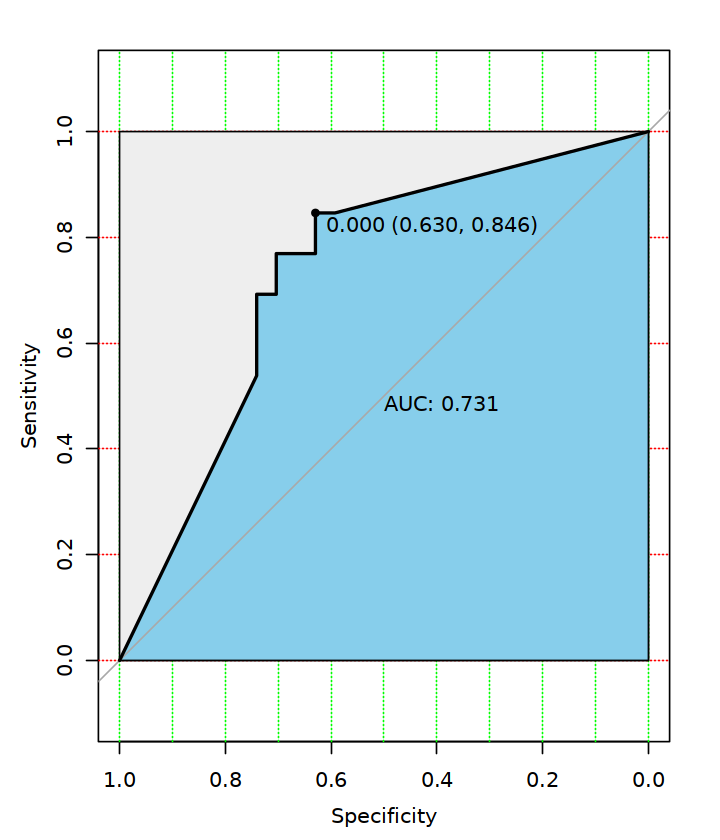

In [102]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")